# Rauscher et al. (2002) core-collapse supernova yields 
The goal of this notebook is to examine the pre-explosion and post-explosion yields from massive star models.  The yields are those from [Rauscher et al. (2002)](https://ui.adsabs.harvard.edu/abs/2002ApJ...576..323R/abstract).  Change the plot parameters as desired for your purposes.  Figures can be saved by right-clicking or control-clicking on the figure in the notebook.  If your current version gets corrupted, don't worry. Simply quit and download a new copy from GitHub, or start up a new version on Google Colab.

Begin by installing and importing the necessary python libraries

In [1]:
import sys, io, requests
import matplotlib.pyplot as plt

!{sys.executable} -m pip install --quiet wnutils
import wnutils.xml as wx 

Read in the pre-supernova and post-supernova *Rauscher et al. (2002)* data and store in a wnutils XML object.

In [2]:
url_pre = 'https://osf.io/znvej/download'
url_post = 'https://osf.io/vqhxr/download'

xml_pre = wx.Xml(io.BytesIO((requests.get(url_pre).content)))
xml_post = wx.Xml(io.BytesIO((requests.get(url_post).content)))

Select the species to plot in the pre-supernova star.

In [3]:
species = ['he4', 'c12', 'c13', 'o16', 'o17', 'o18']

Plot the species vs. interior mass coordinate.  Scale the interior mass coordinate to solar masses.

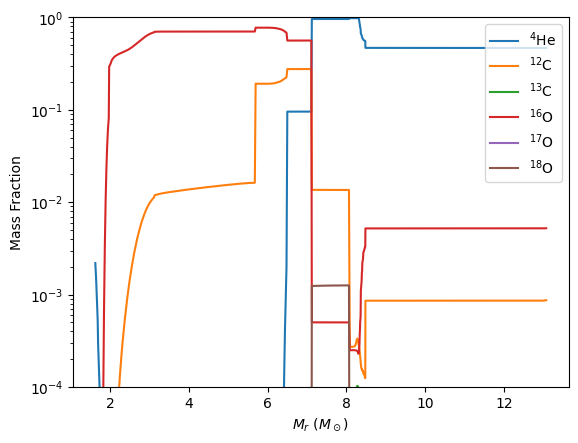

In [4]:
xml_pre.plot_mass_fractions_vs_property('mass below', species, yscale = 'log', ylim = [1.e-4,1],
                                       xfactor = 1.9891e33, use_latex_names=True, xlabel = '$M_r\\ (M_\\odot)$')

Choose and plot post-explosion yields.

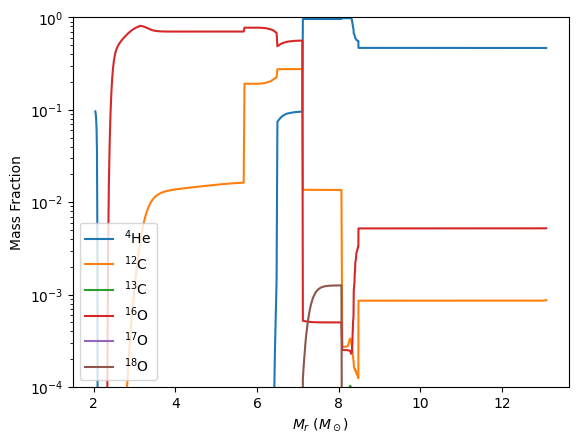

In [5]:
species = ['he4', 'c12', 'c13', 'o16', 'o17', 'o18']

xml_post.plot_mass_fractions_vs_property('mass below', species, yscale = 'log', ylim = [1.e-4,1],
                                        xfactor = 1.9891e33, use_latex_names=True, xlabel = '$M_r\\ (M_\\odot)$')

Plot pre- and post-explosion yields.

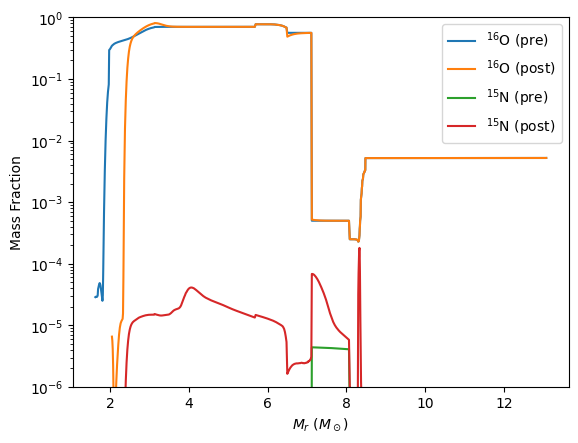

In [6]:
species = ['o16', 'n15']
lnames = xml_pre.get_latex_names(species)

pre_props = xml_pre.get_properties_as_floats(['mass below'])
pre_x = xml_pre.get_mass_fractions(species)

post_props = xml_post.get_properties_as_floats(['mass below'])
post_x = xml_post.get_mass_fractions(species)

for sp in species:
    plt.plot(pre_props['mass below'] / 1.9891e33, pre_x[sp], label = lnames[sp] + ' (pre)')
    plt.plot(post_props['mass below'] / 1.9891e33, post_x[sp], label = lnames[sp] + ' (post)')
    
plt.ylim([1.e-6,1])
plt.yscale('log')
plt.xlabel('$M_r\\ (M_\\odot)$')
plt.ylabel('Mass Fraction')

plt.legend()
plt.show()